In [1]:
import json
import matplotlib
from matplotlib import pyplot as plt
import pickle
import sklearn
import numpy as np
%matplotlib inline

In [2]:
oresults_path = '../predicted-results/original'
mresults_path = '../predicted-results/mixed5050'
eresults_path = '../predicted-results/everything'

omodels_path = '../models/original'
mmodels_path = '../models/mixed5050'
emodels_path = '../models/everything'

test_sets = ['5050', '2575', 'everything']

mfractions = [0.05, 0.1, 0.2,
              0.3, 0.5, 0.7, 1]
efractions = [0.01, 0.02, 0.03,
             0.05, 0.1, 0.2, 0.3,
             0.5, 0.7, 1]

In [3]:
results = {'5050': {'COF': dict(),
                    'intercept': dict()},
           '2575': {'COF': dict(),
                    'intercept': dict()},
           'everything': {'COF': dict(),
                          'intercept': dict()}}
# First deal with the original models 
for tset in results:
    for target in ['COF', 'intercept']:
        with open(f'{omodels_path}/{target}.pickle', 'rb') as f:
            model = pickle.load(f)
        with open(f'{omodels_path}/{target}.ptxt', 'rb') as f:
            features = pickle.load(f)
        with open(f'{oresults_path}/{target}_on_{tset}.json', 'r') as f:
            data = json.load(f)
        results[tset][target]['original'] = {
#             'model': model,
#             'features': features,
#             'data': data,
              'n_train': len(model.oob_prediction_),
              'r_square': data[target]['r_square']
        }

# Then deal with the 5050 mixed models 
for tset in results:
    for i in range(5):
        for fraction in mfractions:
            for target in ['COF', 'intercept']:
                with open(f'{mmodels_path}/set_{i}/{target}_{fraction}.pickle', 'rb') as f:
                    model = pickle.load(f)
                with open(f'{mmodels_path}/set_{i}/{target}_{fraction}.ptxt', 'rb') as f:
                    features = pickle.load(f)
                with open(f'{mresults_path}/set_{i}/{target}_{fraction}_on_{tset}.json', 'r') as f :
                    data = json.load(f)
                if i == 0:
                    results[tset][target][f'5050_{fraction}'] = {
    #                 'model': model,
    #                 'features': features,
    #                 'data': data,
                      'n_train': len(model.oob_prediction_),
                      'r_square': [data[target]['r_square']]}
                else:
                    results[tset][target][f'5050_{fraction}']['r_square'].append(data[target]['r_square'])
# Lastly deal with the everything models
for tset in results:
    for i in range(5):
        for fraction in efractions:
            for target in ['COF', 'intercept']:
                with open(f'{emodels_path}/set_{i}/{target}_{fraction}.pickle', 'rb') as f:
                    model = pickle.load(f)
                with open(f'{emodels_path}/set_{i}/{target}_{fraction}.ptxt', 'rb') as f:
                    features = pickle.load(f)
                with open(f'{eresults_path}/set_{i}/{target}_{fraction}_on_{tset}.json', 'r') as f :
                    data = json.load(f)
                if i == 0:
                    results[tset][target][f'everything_{fraction}'] = {
    #                 'model': model,
    #                 'features': features,
    #                 'data': data,
                      'n_train': len(model.oob_prediction_),
                      'r_square': [data[target]['r_square']]}
                else:
                    results[tset][target][f'everything_{fraction}']['r_square'].append(data[target]['r_square'])


In [4]:
for tset in results:
    for target in ['COF', 'intercept']:
        for fraction in mfractions:
            # doi: dict of interest
            doi = results[tset][target][f'5050_{fraction}']
            doi['r_square_avg'] = np.average(doi['r_square'])
            doi['r_square_std'] = np.std(doi['r_square'])

        for fraction in efractions:
            doi = results[tset][target][f'everything_{fraction}']
            doi['r_square_avg'] = np.average(doi['r_square'])
            doi['r_square_std'] = np.std(doi['r_square'])
            

## Combination R<sup>2</sup> Plots

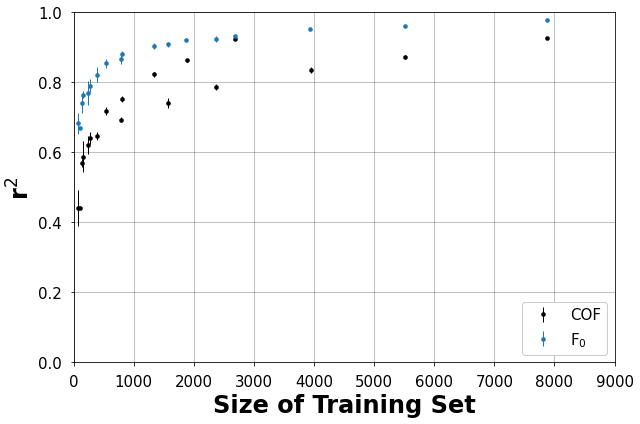

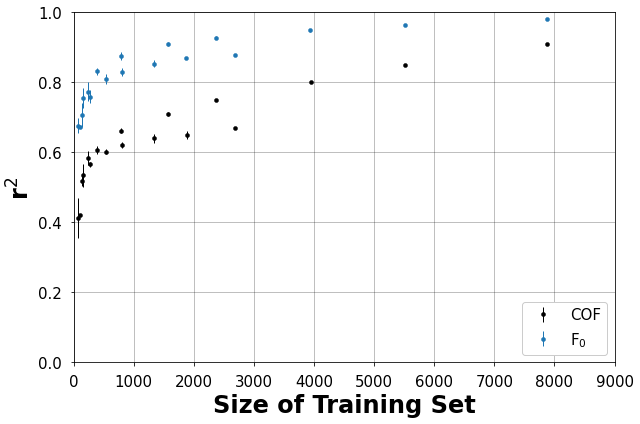

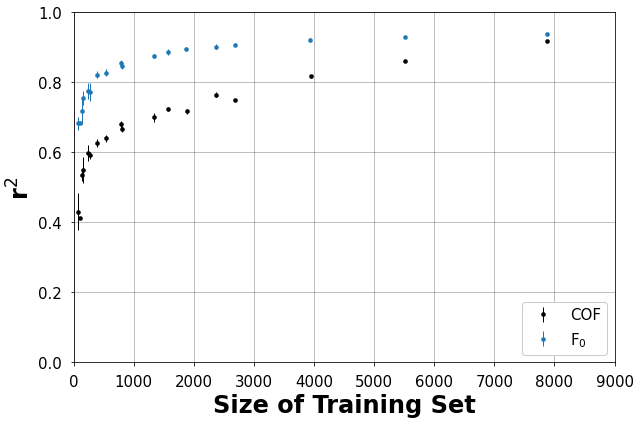

In [13]:
for tset in test_sets:
    to_plot = {'COF': {'n_train': list(),
                       'r_square_avg': list(),
                       'r_square_std': list()},
               'intercept': {'n_train': list(),
                             'r_square_avg': list(),
                             'r_square_std': list()}}
    for target in ['COF', 'intercept']:
        for model, data in results[tset][target].items():
            #print(data)
            try:
                to_plot[target]['r_square_avg'].append(data['r_square_avg'])
                to_plot[target]['r_square_std'].append(data['r_square_std'])
                to_plot[target]['n_train'].append(data['n_train'])

            except KeyError:
                to_plot[target]['n_train'].append(data['n_train'])
                to_plot[target]['r_square_avg'].append(data['r_square'])
                to_plot[target]['r_square_std'].append(0)
                
    #print(to_plot)
    #plt.title('Effect of Training Set Size', fontsize=20, fontweight='bold')
    plt.figure(figsize=[9, 6])
    plt.xlabel('Size of Training Set')
    plt.ylabel('r$^2$')
    plt.xlim(0, 9000)
    plt.ylim(0, 1)
    plt.errorbar(x=to_plot['COF']['n_train'],
                 y=to_plot['COF']['r_square_avg'],
                 yerr=to_plot['COF']['r_square_std'],
                 color='black',
                 fmt='.',
                 elinewidth=1)
    plt.errorbar(x=to_plot['intercept']['n_train'],
                 y=to_plot['intercept']['r_square_avg'],
                 yerr=to_plot['intercept']['r_square_std'],
                 fmt='.',
                 elinewidth=1)
    plt.legend(['COF', 'F$_0$'], loc=4)

## Refined R<sup>2</sup> plot
Original + 5050 models on 5050 test set

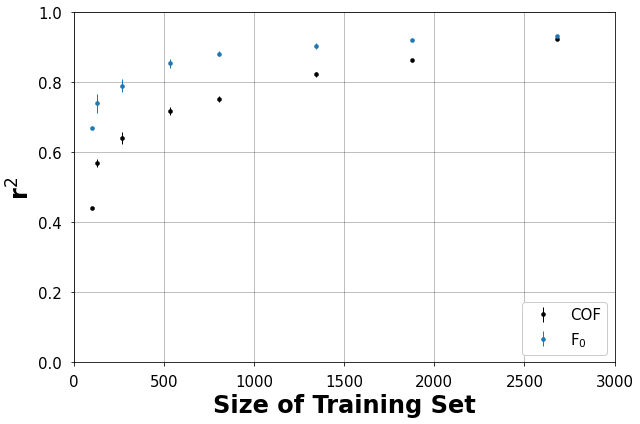

In [23]:
to_plot_on_5050 = {'COF': {'n_train': list(),
                           'r_square_avg': list(),
                           'r_square_std': list()},
                   'intercept': {'n_train': list(),
                                 'r_square_avg': list(),
                                 'r_square_std': list()}}
for target in ['COF', 'intercept']:
    for model, data in results['5050'][target].items():
        if ('original' in model) or ('5050' in model):
            try:
                to_plot_on_5050[target]['r_square_avg'].append(data['r_square_avg'])
                to_plot_on_5050[target]['r_square_std'].append(data['r_square_std'])
                to_plot_on_5050[target]['n_train'].append(data['n_train'])
            except KeyError:
                to_plot_on_5050[target]['r_square_avg'].append(data['r_square'])
                to_plot_on_5050[target]['r_square_std'].append(0)
                to_plot_on_5050[target]['n_train'].append(data['n_train'])
                
plt.figure(figsize=(9, 6))

#plt.title('Effect of Training Set Size', fontsize=20)
plt.xlabel('Size of Training Set')
plt.ylabel('r$^2$')
plt.xlim(0, 3000)
plt.ylim(0, 1)
plt.errorbar(x=to_plot_on_5050['COF']['n_train'],
            y=to_plot_on_5050['COF']['r_square_avg'],
            yerr=to_plot_on_5050['COF']['r_square_std'],
            color='black',
            fmt='.',
            elinewidth=1)
plt.errorbar(x=to_plot_on_5050['intercept']['n_train'],
            y=to_plot_on_5050['intercept']['r_square_avg'],
            yerr=to_plot_on_5050['intercept']['r_square_std'],
            fmt='.',
            elinewidth=1)

plt.legend(labels=['COF', 'F$_0$'], loc=4)
plt.savefig(fname='./plots/og+5050_on_5050.pdf', dpi=500)

## Refined R<sup>2</sup> plot 
Original and 5050 models on 2575 test set

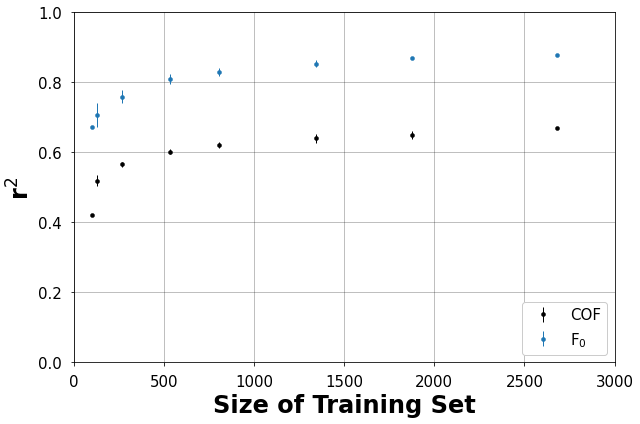

In [21]:
to_plot_on_2575 = {'COF': {'n_train': list(),
                           'r_square_avg': list(),
                           'r_square_std': list()},
                   'intercept': {'n_train': list(),
                                 'r_square_avg': list(),
                                 'r_square_std': list()}}
for target in ['COF', 'intercept']:
    for model, data in results['2575'][target].items():
        if ('original' in model) or ('5050' in model):
            try:
                to_plot_on_2575[target]['r_square_avg'].append(data['r_square_avg'])
                to_plot_on_2575[target]['r_square_std'].append(data['r_square_std'])
                to_plot_on_2575[target]['n_train'].append(data['n_train'])
            except KeyError:
                to_plot_on_2575[target]['r_square_avg'].append(data['r_square'])
                to_plot_on_2575[target]['r_square_std'].append(0)
                to_plot_on_2575[target]['n_train'].append(data['n_train'])
plt.figure(figsize=(9, 6))

#plt.title('Effect of Training Set Size', fontsize=20)
plt.xlabel('Size of Training Set')
plt.ylabel('r$^2$')
plt.xlim(0, 3000)
plt.ylim(0, 1)
plt.errorbar(x=to_plot_on_2575['COF']['n_train'],
            y=to_plot_on_2575['COF']['r_square_avg'],
            yerr=to_plot_on_2575['COF']['r_square_std'],
            fmt='.',
            color='black',
            elinewidth=1)
plt.errorbar(x=to_plot_on_2575['intercept']['n_train'],
            y=to_plot_on_2575['intercept']['r_square_avg'],
            yerr=to_plot_on_2575['intercept']['r_square_std'],
            fmt='.',
            elinewidth=1)
plt.legend(labels=['COF', 'F$_0$'], loc=4)
plt.savefig(fname='./plots/og+5050_on_2575.pdf', dpi=500)

## Refined R<sup>2</sup> plot 
Everything model on everything test set

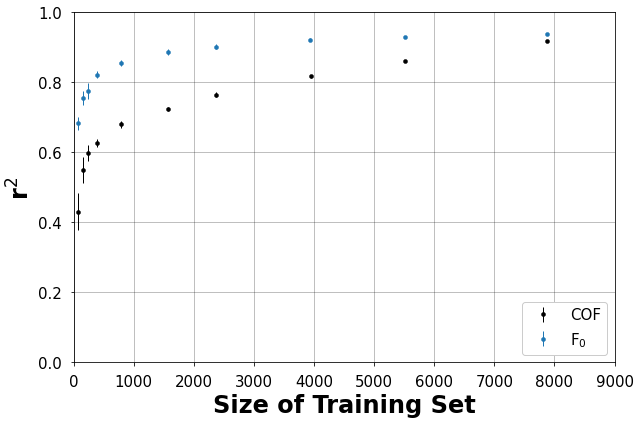

In [22]:
to_plot_on_everything = {'COF': {'n_train': list(),
                                 'r_square_avg': list(),
                                 'r_square_std': list()},
                   'intercept': {'n_train': list(),
                                 'r_square_avg': list(),
                                 'r_square_std': list()}}
for target in ['COF', 'intercept']:
    for model, data in results['everything'][target].items():
        if ('everything' in model):
            to_plot_on_everything[target]['n_train'].append(data['n_train'])
            to_plot_on_everything[target]['r_square_avg'].append(data['r_square_avg'])
            to_plot_on_everything[target]['r_square_std'].append(data['r_square_std'])
            
plt.figure(figsize=(9, 6))

#plt.title('Effect of Training Set Size', fontsize=20)
plt.xlabel('Size of Training Set')
plt.ylabel('r$^2$')
plt.xlim(0, 9000)
plt.ylim(0, 1)
plt.errorbar(x=to_plot_on_everything['COF']['n_train'],
            y=to_plot_on_everything['COF']['r_square_avg'],
            yerr=to_plot_on_everything['COF']['r_square_std'],
            fmt='.',
            color='black',
            elinewidth=1)
plt.errorbar(x=to_plot_on_everything['intercept']['n_train'],
            y=to_plot_on_everything['intercept']['r_square_avg'],
            yerr=to_plot_on_everything['intercept']['r_square_std'],
            fmt='.',
            elinewidth=1)
plt.legend(labels=['COF', 'F$_0$'], loc=4)
plt.savefig(fname='./plots/og+everything_on_everything.pdf', dpi=500)